In [1]:
#import numpy as np 
import ants
import os
import nibabel as nib 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
bone_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_masked_out_BONE"
std_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_masked_out_STANDARD"

bone_res_mask = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/inference_resampled_lung_masks/inspiratory_BONE"
std_res_mask = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/inference_resampled_lung_masks/expiratory_STANDARD"

In [3]:
bone_non_harm_files = sorted(os.listdir(bone_non_harm))
std_non_harm_files = sorted(os.listdir(std_non_harm))

bone_res_mask_files = sorted(os.listdir(bone_res_mask))
std_res_mask_files = sorted(os.listdir(std_res_mask))

bone_non_harm_file = os.path.join(bone_non_harm, bone_non_harm_files[0])
std_non_harm_file = os.path.join(std_non_harm, std_non_harm_files[0])

bone_res_mask_file = os.path.join(bone_res_mask, bone_res_mask_files[0])
std_res_mask_file = os.path.join(std_res_mask, std_res_mask_files[0])


In [5]:
bone_non_harm_img = ants.image_read(bone_non_harm_file)
std_non_harm_img = ants.image_read(std_non_harm_file)

bone_res_mask_img = ants.image_read(bone_res_mask_file)
std_res_mask_img = ants.image_read(std_res_mask_file)

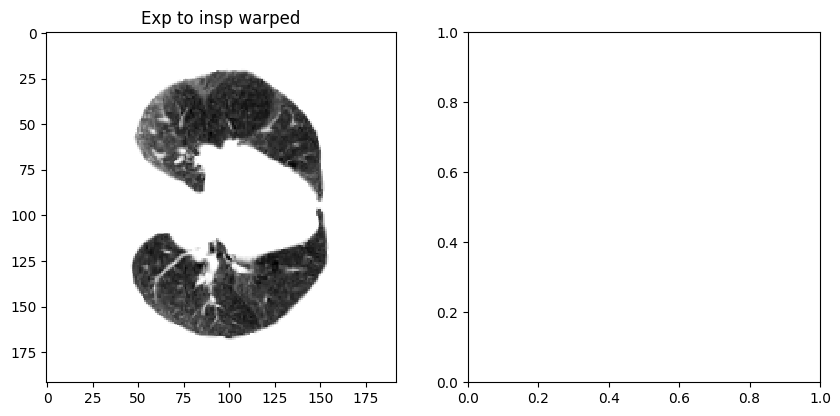

In [6]:
reg_exp_to_insp = ants.registration(fixed = bone_non_harm_img, moving = std_non_harm_img, type_of_transform = 'SyN', mask= bone_res_mask_img, moving_mask = std_res_mask_img, mask_all_stages=True)
warped_img_exp_to_insp = ants.apply_transforms(fixed = bone_non_harm_img, moving = std_non_harm_img, transformlist = reg_exp_to_insp['fwdtransforms'])
warped_img_insp_to_exp = ants.apply_transforms(fixed = std_non_harm_img, moving = bone_non_harm_img, transformlist = reg_exp_to_insp['invtransforms'])

#plot the image

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.rot90(warped_img_exp_to_insp.numpy()[:,:,100], cmap='gray')
plt.title('Exp to insp warped')
plt.subplot(2,2,2)